In [37]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

import statsmodels.stats.multicomp as mc

import warnings
warnings.filterwarnings('ignore')

## Question 1

In [3]:
fifa= pd.read_csv("fifa_stats.csv")
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
fifa.shape

(2000, 15)

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [6]:
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [9]:
pd.set_option("display.max_rows", None)

In [10]:
fifa.dropna(inplace=True)

In [11]:
fifa.shape

(1981, 15)

In [12]:
fifa.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall_rating              0
Potential                   0
Club                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Jersey Number               0
Height                      0
Weight                      0
dtype: int64

In [13]:
fifa.skew()

Age                         0.181789
Overall_rating              1.364577
Potential                   0.667032
International Reputation    0.850408
Weak Foot                   0.070456
Skill Moves                -0.356760
Jersey Number               2.834339
Height                     -0.543864
Weight                      0.159728
dtype: float64

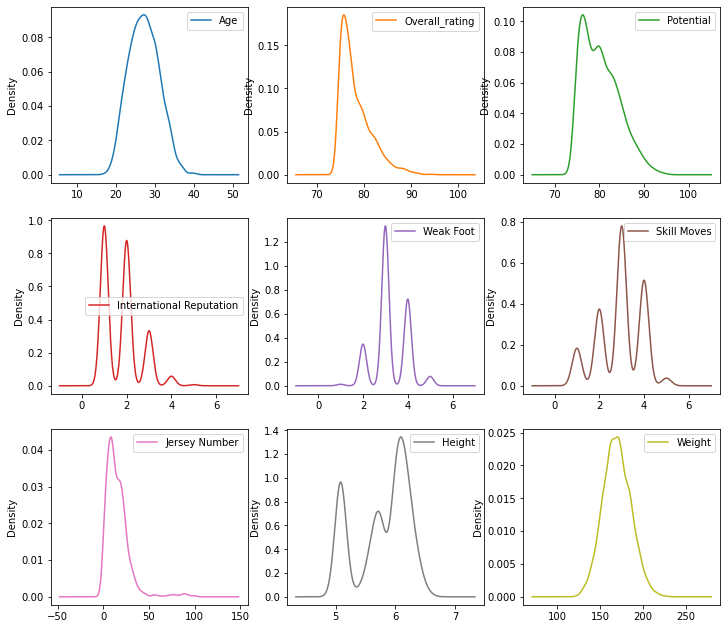

In [14]:
plt.rcParams["figure.figsize"] = [12,11]
fifa.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

## STATISTICS

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.


#### Answer a

In [246]:
np.random.choice(fifa.Age, size=200, replace=False)

array([21, 34, 28, 23, 30, 34, 24, 32, 27, 30, 25, 28, 25, 24, 33, 32, 27,
       30, 20, 29, 28, 25, 30, 25, 32, 25, 22, 26, 21, 29, 35, 22, 28, 29,
       28, 21, 30, 25, 35, 24, 28, 22, 27, 28, 34, 27, 25, 30, 34, 22, 21,
       25, 31, 23, 30, 30, 21, 32, 29, 26, 25, 31, 25, 23, 26, 22, 25, 25,
       22, 25, 27, 29, 28, 27, 26, 26, 25, 34, 29, 26, 30, 23, 28, 25, 26,
       34, 26, 25, 26, 32, 24, 27, 18, 33, 36, 31, 28, 25, 30, 27, 22, 28,
       28, 40, 34, 31, 22, 31, 26, 23, 21, 30, 27, 31, 30, 30, 26, 24, 29,
       26, 28, 29, 30, 27, 30, 25, 27, 27, 26, 23, 23, 19, 34, 31, 27, 23,
       24, 27, 21, 31, 24, 26, 25, 22, 33, 25, 29, 24, 29, 28, 20, 34, 19,
       36, 27, 24, 28, 25, 20, 27, 28, 32, 25, 24, 20, 32, 27, 24, 24, 18,
       31, 25, 29, 33, 29, 26, 35, 24, 25, 22, 27, 21, 30, 26, 28, 25, 33,
       28, 24, 26, 30, 23, 30, 28, 35, 24, 29, 23, 32, 24], dtype=int64)

In [19]:
def sample_mean_calculator(population_array, n_samples):
    
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(population_array, size=200, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)    
    return sample_means

In [20]:
sample_dist= sample_mean_calculator(fifa.Age,100)
print(sample_dist)

[27.27, 27.155, 27.27, 26.995, 26.805, 27.16, 26.585, 27.14, 27.255, 27.655, 27.01, 27.56, 27.475, 27.675, 26.96, 27.28, 27.07, 27.08, 27.075, 27.515, 27.065, 26.87, 27.385, 26.575, 27.075, 27.38, 27.315, 26.76, 27.26, 26.7, 27.525, 27.74, 27.65, 27.21, 27.5, 27.005, 26.725, 26.915, 27.385, 27.585, 27.23, 27.285, 27.23, 26.96, 27.265, 27.81, 27.36, 26.865, 27.34, 27.48, 27.225, 27.4, 27.24, 26.8, 27.32, 27.43, 27.095, 27.2, 27.44, 27.315, 26.76, 26.925, 26.955, 27.18, 27.13, 27.165, 27.325, 27.55, 27.105, 27.51, 27.275, 27.28, 27.19, 27.13, 27.425, 27.525, 27.42, 27.175, 27.03, 27.015, 27.075, 27.675, 27.41, 27.715, 26.965, 27.4, 27.015, 26.565, 27.41, 27.185, 27.555, 27.41, 27.04, 26.77, 27.16, 26.785, 27.805, 27.565, 26.95, 26.925]


In [21]:
alpha=0.05
test, pval= stats.shapiro(sample_dist)
print(pval)
if pval>alpha:
    print("sample_dist follows normal distribution")
else:
    print("sample_dist do not follows normal distribution")

0.7119245529174805
sample_dist follows normal distribution


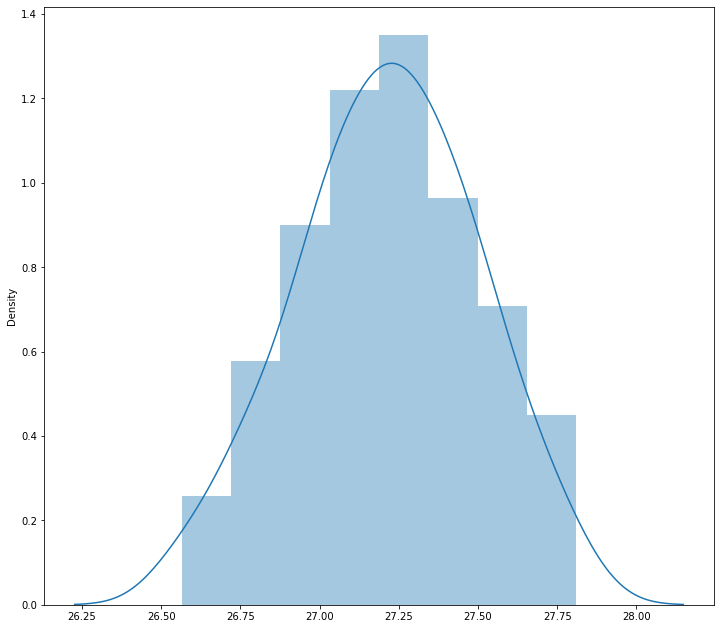

In [38]:
sns.distplot(sample_dist)
plt.show()

In [24]:
from scipy.stats import probplot

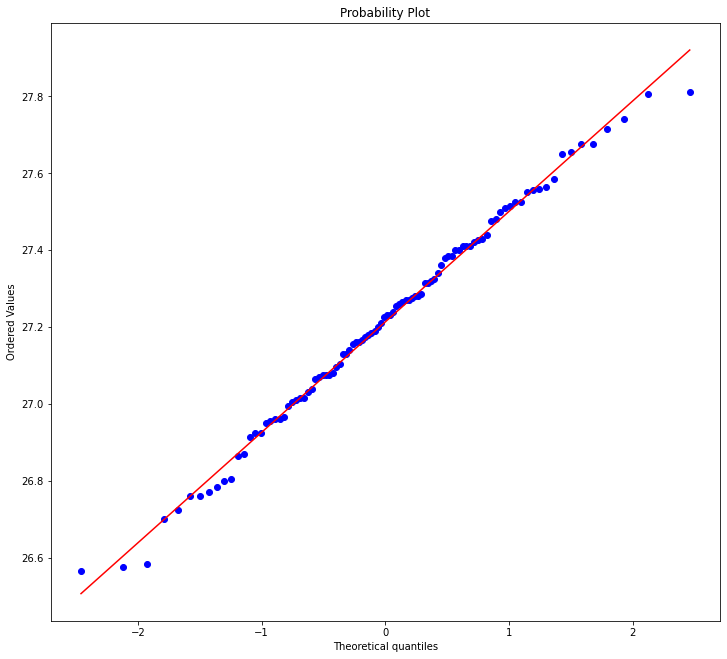

In [25]:
probplot(sample_dist, plot=plt)
plt.show()

#### Answer b

In [26]:
fifa.Overall_rating.skew()

1.3645767139850027

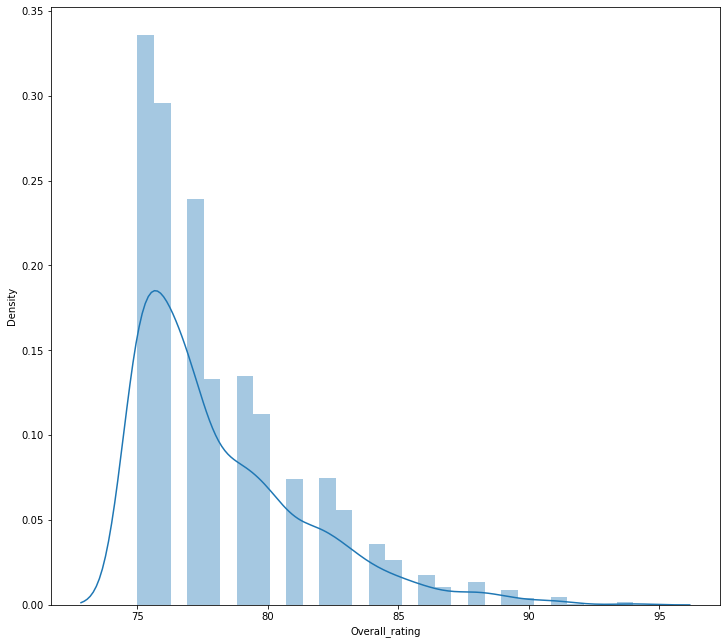

In [27]:
sns.distplot(fifa.Overall_rating)
plt.show()

H0: Overall rating>=80

H1: Overall rating<80

In [86]:
stats.shapiro(fifa.Overall_rating)

ShapiroResult(statistic=0.8532959818840027, pvalue=1.721150444000814e-39)

In [48]:
xbar=np.mean(fifa.Overall_rating)
print(xbar)
mu=80
n=len(fifa.Overall_rating)
s=np.std(fifa.Overall_rating,ddof=1)
print(s)
se=s/np.sqrt(n)
print(se)

78.21201413427562
3.2936236272197243
0.07400000203889656


In [49]:
zscore=(xbar-mu)/se
print(zscore)

-24.161970492711102


In [54]:
cv = stats.norm.ppf(0.05)
print("critical value is",cv)

critical value is -1.6448536269514729


In [56]:
pval= stats.norm.cdf(zscore)
print("pval is", pval)

pval is 2.7944738689413764e-129


In [41]:
sts, pval= stests.ztest(fifa.Overall_rating,value=80,alternative="smaller")
print(pval)

2.871864282804179e-133


In [58]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


* We can see the pval is less than alpha we reject the null hypothesis.
* Zcore is less than critical value we reject null hypotheis.
###### Hence, we can conclude that overall rating is not more than 80

#### Answer 3 C

In [44]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [29]:
print(stats.shapiro(fifa.Potential))

ShapiroResult(statistic=0.9392035603523254, pvalue=9.272585199141702e-28)


H0: Preferred foot has no effect on potential

H1: Preferred foot has effect on potential

In [30]:
fifa["Preferred Foot"].value_counts()

Right    1519
Left      462
Name: Preferred Foot, dtype: int64

In [31]:
right=fifa.loc[fifa["Preferred Foot"]=="Right","Potential"]
left=fifa.loc[fifa["Preferred Foot"]=="Left","Potential"]

In [32]:
sts, pval = stats.ttest_ind(right,left)
print(pval)

0.1029186188520214


In [33]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Fail to reject null hypothesis


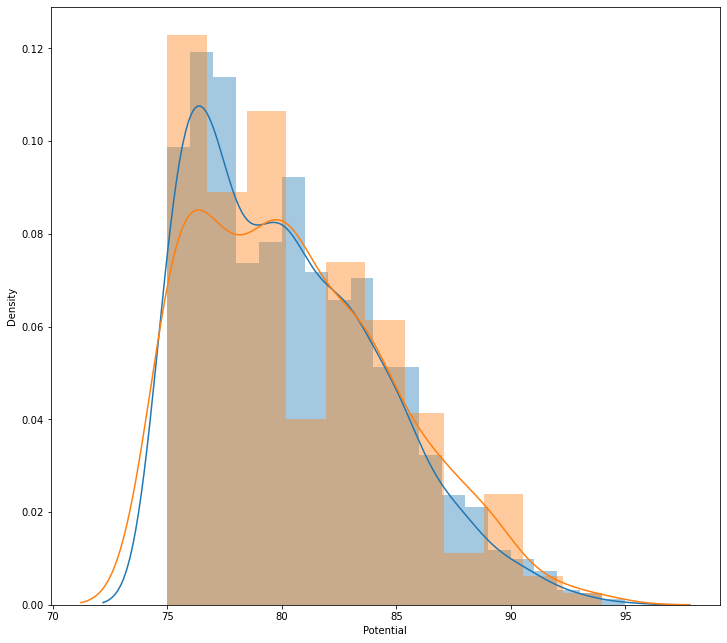

In [34]:
sns.distplot(right)
sns.distplot(left)
plt.show()

* Since pval is greater than alpha we fail to reject Null hypothesis.
###### Hence we can conclude there is significant effect of preffered foot on potential.

##### Answer D

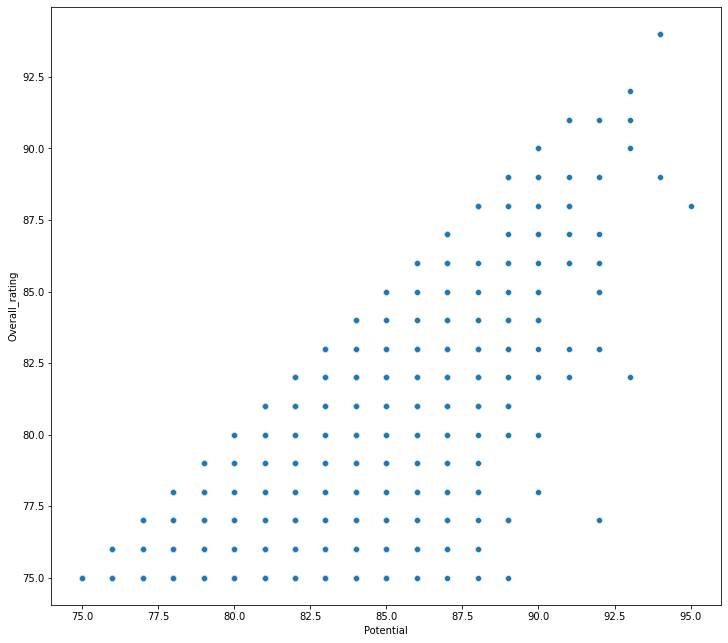

In [35]:
sns.scatterplot(y="Overall_rating",x="Potential",data=fifa)
plt.show()

###### There is linear relationship between Overall rating and potential.

#### Answer E

Ho: Skills moves have effect on Overall Rating.

H1: Skill moves do not effect have Overall rating

In [36]:
fifa["Skill Moves"].value_counts()

3    818
4    540
2    392
1    192
5     39
Name: Skill Moves, dtype: int64

In [74]:
test= ols('fifa.Overall_rating ~ fifa["Skill Moves"]', fifa).fit()
anova_type1= anova_lm(test, typ=1)
anova_type1

,df,sum_sq,mean_sq,F,PR(>F)
"fifa[""Skill Moves""]",1.0,143.697945,143.697945,13.390827,0.000259
Residual,1998.0,21440.684055,10.731073,NaN,NaN


In [68]:
pval=0.000259

In [69]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


* Skill moves does not have effect on over all ratings

### Ques 2

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

e)	Perform statistical tests to identify the relation between network and network_type. 


In [40]:
phone= pd.read_csv("phone.csv")
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [41]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [42]:
phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [43]:
cat= phone.select_dtypes(include="object").columns
print(cat)

Index(['date', 'item', 'month', 'network', 'network_type'], dtype='object')


In [44]:
num= phone.select_dtypes(exclude="object").columns
print(num)

Index(['duration'], dtype='object')


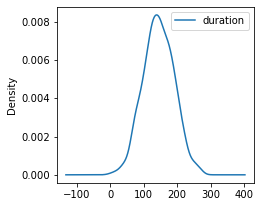

In [45]:
phone.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

#### Answer A

In [94]:
xbar=np.mean(phone.duration)
std=np.std(phone.duration, ddof=1)
n=len(phone.duration)
se=std/np.sqrt(n)

In [98]:
ci1= stats.norm.interval(0.95, loc= xbar, scale=se)
print("95% Confidence Interval is", ci1)

95% Confidence Interval is (141.1778397288302, 147.4320313908407)


In [99]:
ci1= stats.norm.interval(0.99, loc= xbar, scale=se)
print("95% Confidence Interval is", ci1)

95% Confidence Interval is (140.19523500408818, 148.41463611558274)


As we can see the 99% confidenc interval is wider.

#### Answer C

H0: Data is equally distributed

H1: Data is not equally distributed

In [101]:
phone.network.value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [109]:
obs=[215,215,150,87,84,42,27]
exp=[phone.network.count()/len(phone.network.value_counts())]*7

In [116]:
sts, pval =chisquare(obs, exp)
print(pval)

2.112592760257685e-63


In [114]:
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


* Since pval is less than alpha we reject null hypotheis
##### We can conclude that network type are not distribited equally

##### Answer C

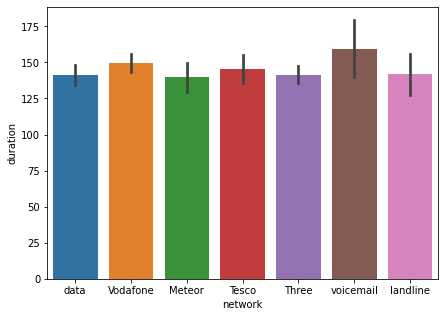

In [121]:
plt.figure(figsize=[7,5])
sns.barplot(x='network',y='duration', data=phone)
plt.show()

#### Answer D

H0: There average duration of all items is same

H1: There average duration of all items is different

In [122]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
test=ols(" duration  ~ item ",phone).fit()
anova_lm(test,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
item,2.0,8.044792e+03,4022.395964,1.931396,0.145607
Residual,817.0,1.701514e+06,2082.636053,NaN,NaN


In [130]:
0.145607<0.05

False

* The pval is not less than alpha we fail to reject null hypothesis.
#### We can conclude that the average duration of different items is same.

In [129]:
comp = mc.MultiComparison(data =phone["duration"], groups = phone["item"])
post_hoc = comp.tukeyhsd(alpha = 0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
call,data,-6.6347,0.2862,-16.9372,3.6678,False
call,sms,-6.0621,0.207,-14.4472,2.323,False
data,sms,0.5726,0.9,-10.2563,11.4015,False


##### Answer E

H0: The network and network type are independant

H1: the network and network type are dependant

In [134]:
obs=pd.crosstab(phone["network_type"],phone["network"])
obs

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


In [133]:
sts,pval,ddof,exp=chi2_contingency(observed=obs)
print(pval)

0.0


* As we can see pval is les than aplha. we reject null hypothesis.
##### We can conclude that network and newtork type are dependant.